<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/Pr%C3%A1ctica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2>Práctica en clase 2</h2>

Clase y funciones auxiliares

In [10]:
from math import sin, cos
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


class Shoot:

    def __init__(self,v,theta,g=9.81):
        self.v = v
        self.g = g
        self.theta = theta
        self.t_final = 2*self.v*sin(self.theta)/self.g
        self.ts = np.linspace(0,self.t_final,100)
        self.path = np.array([self.__posicion(t) for t in self.ts])
        self.distancia = np.max(self.path[:,0])

    def __posicion(self,t):
        x = self.v*t*cos(self.theta)
        y = self.v*t*sin(self.theta)-0.5*self.g*t**2
        if y<0: # just in case
            y = 0
        return (x,y)

    def graficar(self,fname='shoot.gif'):
        def update(t):
            ax.clear()
            fig.suptitle(f"Distancia alcanzada: {round(self.distancia,2)}\nt={t}")
            ax.axhline(0,color='gray')
            ax.axvline(0,color='gray')
            ax.plot(self.path[:,0],self.path[:,1],color='gray',alpha=0.25,linestyle='-')
            X = self.__posicion(t)
            ax.scatter([X[0]], [X[1]], s=50, color='black')
        fig, ax = plt.subplots(figsize=(7,5))
        ani = animation.FuncAnimation(fig, update, frames=self.ts, interval=1000/24)
        ani.save(fname, writer='pillow')
        plt.close(fig)

# La ecuación

La altura $h$ que alcanzará, en una distancia $d$, un proyectil lanzado con velocidad $v$ y ángulo $\theta$ está dado por

$$h(d) = d\tan(\theta) - \frac{gd^2}{2v^2\cos^2(\theta)} $$

Queremos averiguar el ángulo necesario para alcanzar un objetivo a una distancia $d$, cuando lanzamos el proyectil con velocidad $v$. Para esto, hay que encontrar la raiz de la ecuación anterior, es decir, el valor $d$ tal que $h(d)=0$.

# Probar el módelo

Define tus parámetros

In [11]:
g = 9.8
theta = 1
v = 3.5

Prueba el disparo

El disparo alcanzó la distancia 1.1354631476671357 m en 0.6004380115856549 segundos


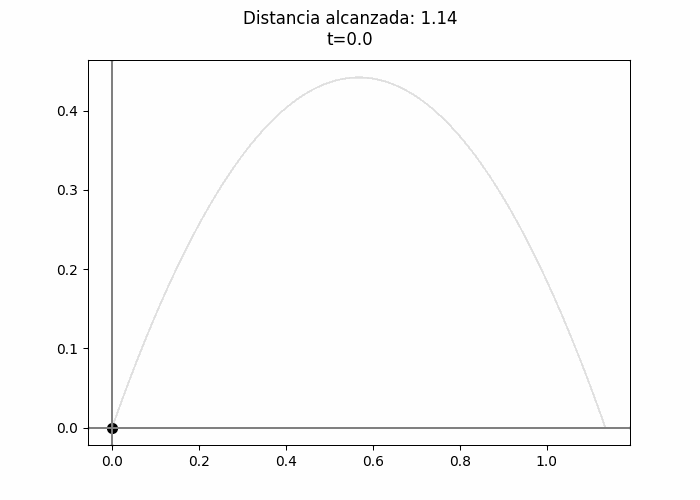

In [12]:
from IPython.display import Image

disparo = Shoot(v,theta)
print(f"El disparo alcanzó la distancia {disparo.distancia} m en {disparo.t_final} segundos")
disparo.graficar()

Image(open('shoot.gif','rb').read())